In [14]:
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import json

In [15]:
def proba_data(real,pred,step):
    y = []
    x = []
    i = 0
    while i < len(real):
        ones = len(pred[(pred < i + step) & (pred >= i) & (real == 1)])
        all = len(pred[(pred < i + step) & (pred >= i)])
        if all == 0:
            break
        y.append(ones / all)
        x.append(i + (step / 2))
        i += step
    return x,y

In [16]:
df = pd.read_feather('big_frame_4.feather')
x,y = df.drop('DEFAULT',axis = 1).values,df['DEFAULT'].values

3266/3266 [==============================] - 3s 1ms/step


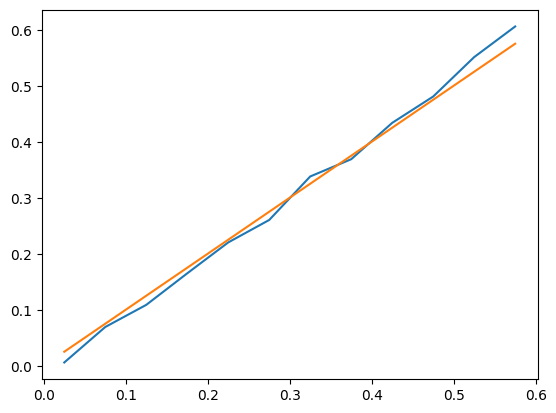

In [17]:
model = load_model('model2.h5')
prediction = model.predict(x).ravel()
probx,proby = proba_data(y,prediction,0.05)
plt.plot(probx,proby)
plt.plot(probx,probx)
plt.show()

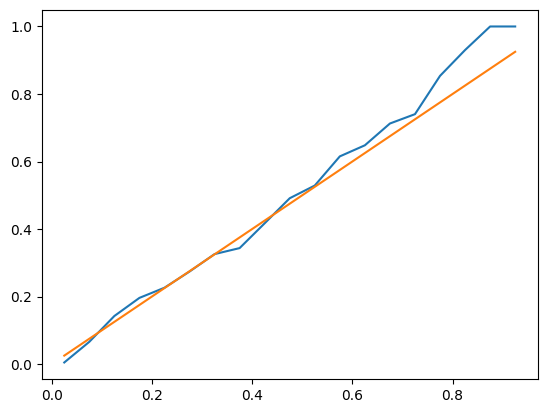

In [18]:
model = XGBClassifier()
model.load_model('model_load.json')
def square(x,a,b,c):
    return ((x ** 2) * a) + (x * b) + c
popt = json.load(open('coef.json','r'))
prediction = np.array([square(k,*popt) for k in model.predict_proba(x)[:,1].ravel()])
probx,proby = proba_data(y,prediction,0.05)
plt.plot(probx,proby)
plt.plot(probx,probx)
plt.show()

3266/3266 [==============================] - 4s 1ms/step


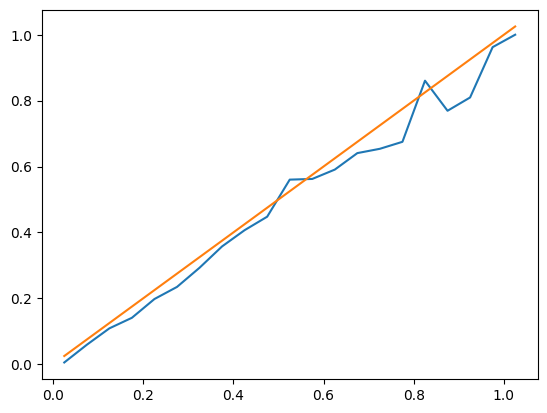

In [19]:
model = load_model('modelv2.h5')
prediction = model.predict(x).ravel()
probx,proby = proba_data(y,prediction,0.05)
plt.plot(probx,proby)
plt.plot(probx,probx)
plt.show()